In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path_of_file = r'tock_price_prediction\Stocks\hpq.us.txt'
df = pd.read_csv(path_of_file,delimiter=',',
                usecols=['Date','Open','High','Low','Close'])

In [5]:
df.head()

,Date,Open,High,Low,Close
0,1970-01-02,0.30627,0.30627,0.30627,0.30627
1,1970-01-05,0.30627,0.31768,0.30627,0.31385
2,1970-01-06,0.31385,0.31385,0.30996,0.30996
3,1970-01-07,0.31385,0.31385,0.31385,0.31385
4,1970-01-08,0.31385,0.31768,0.31385,0.31385


In [6]:
df = df.sort_values('Date')
df.head()

,Date,Open,High,Low,Close
0,1970-01-02,0.30627,0.30627,0.30627,0.30627
1,1970-01-05,0.30627,0.31768,0.30627,0.31385
2,1970-01-06,0.31385,0.31385,0.30996,0.30996
3,1970-01-07,0.31385,0.31385,0.31385,0.31385
4,1970-01-08,0.31385,0.31768,0.31385,0.31385


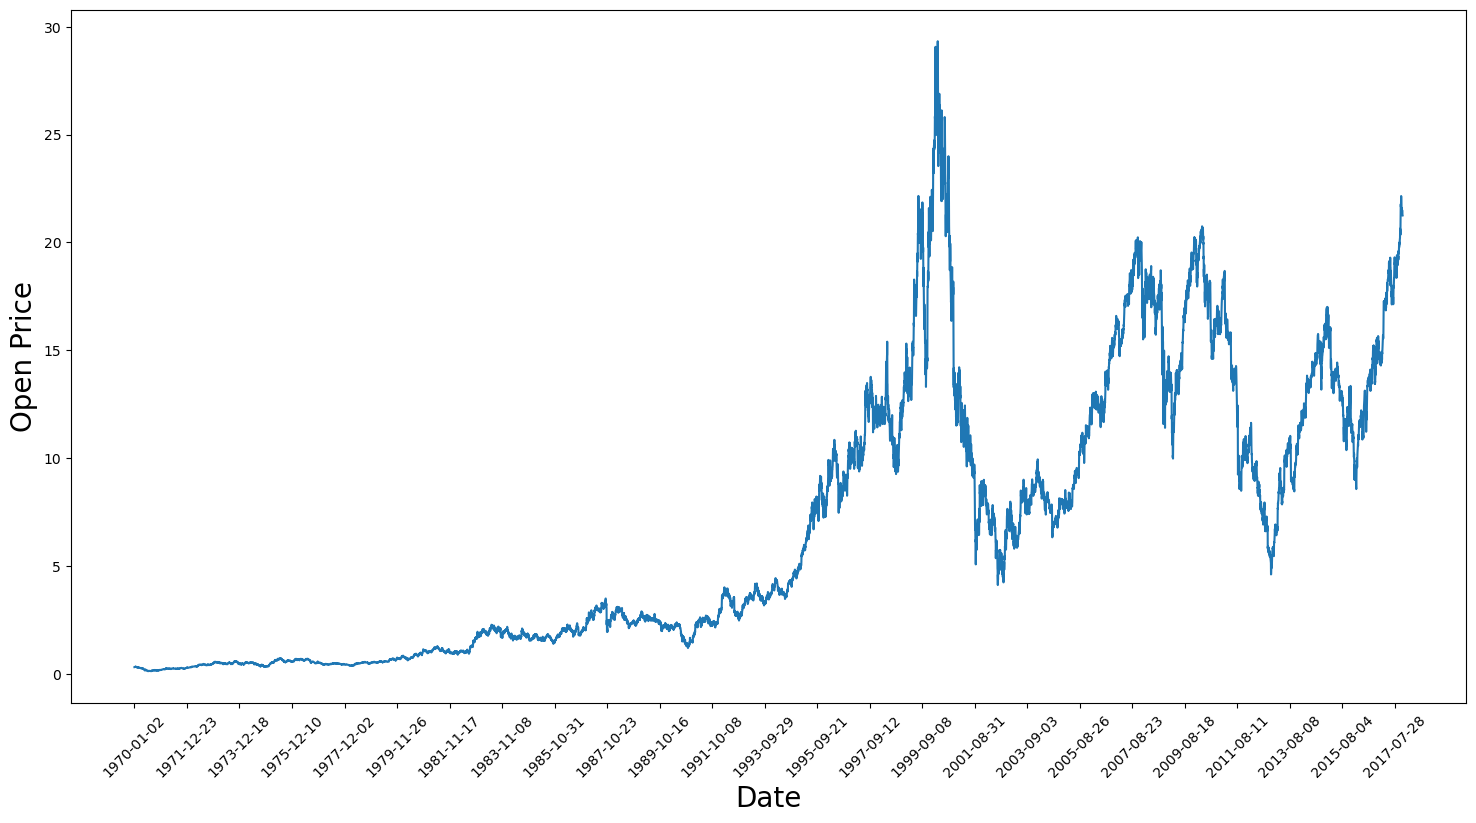

In [7]:
plt.figure(figsize=(18,9))
plt.plot(range(df.shape[0]),df['Open'])
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Open Price',fontsize=20)
plt.show()

In [8]:
D = df.iloc[:,1:2].values

In [11]:
D.shape

(12075, 1)

In [12]:
Tr_set = D[:10000]    # Training set
Ts_set = D[10000:]    # Test set

In [13]:
Tr_set.shape

(10000, 1)

In [14]:
Ts_set.shape

(2075, 1)

In [15]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [16]:
sc = MinMaxScaler(feature_range=(0,1))

In [17]:
Tr_scaled = sc.fit_transform(Tr_set)
Ts_scaled = sc.transform(Ts_set)

In [18]:
seq_len = 100
X_train = []
y_train = []
for i in range(seq_len,len(Tr_scaled)-seq_len):
    X_train.append(Tr_scaled[i-seq_len:i,0])   # A Sliding window
    y_train.append(Tr_scaled[i,0])

In [19]:
type(X_train)

list

In [20]:
X_train,y_train = np.array(X_train),np.array(y_train)

In [18]:
X_train[0]

array([0.00642261, 0.00642261, 0.00668211, 0.00668211, 0.00668211,
       0.00668211, 0.00681323, 0.00707548, 0.0069447 , 0.0069447 ,
       0.00720626, 0.00707548, 0.0069447 , 0.00720626, 0.00720626,
       0.00707548, 0.0069447 , 0.00681323, 0.00654893, 0.00642261,
       0.00628806, 0.00616002, 0.00616002, 0.00616002, 0.00589812,
       0.0057646 , 0.00628806, 0.00616002, 0.00616002, 0.00628806,
       0.00628806, 0.00642261, 0.00654893, 0.00654893, 0.00654893,
       0.00589812, 0.00589812, 0.00602547, 0.00602547, 0.00602547,
       0.00616002, 0.00563382, 0.00563382, 0.0057646 , 0.00563382,
       0.00550372, 0.00524353, 0.00537294, 0.00537294, 0.00524353,
       0.00524353, 0.00524353, 0.00550372, 0.00537294, 0.00524353,
       0.00524353, 0.00498094, 0.00498094, 0.00510933, 0.00510933,
       0.00498094, 0.00498094, 0.00524353, 0.00524353, 0.00510933,
       0.00445337, 0.00432636, 0.00445337, 0.00445337, 0.0047187 ,
       0.0047187 , 0.0047187 , 0.00458655, 0.0041901 , 0.00419

In [21]:
len(X_train[0])

100

In [26]:
len(X_train)

9800

In [22]:
y_train[0]

0.0014430320722864922

In [27]:
len(y_train)

9800

In [28]:
X_test = []
y_test = []
for i in range(seq_len,len(Ts_scaled)-seq_len):
    X_test.append(Ts_scaled[i-seq_len:i,0])
    y_test.append(Ts_scaled[i,0])

In [29]:
X_test,y_test = np.array(X_test),np.array(y_test)

In [30]:
X_train.shape

(9800, 100)

- Reshape X_train and X_test to 3 Dimension fo calculate batch gradient descent.

In [31]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [32]:
X_train.shape

(9800, 100, 1)

In [33]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [34]:
X_test.shape

(1875, 100, 1)

In [36]:
X_test.shape[1]

100

- Model and training

In [37]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,
              input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.1))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(tf.keras.layers.GRU(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
model.compile(optimizer='adam',loss=tf.keras.losses.mse)

In [39]:
model.fit(X_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 37s 102ms/step - loss: 0.0056
Epoch 2/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 30s 98ms/step - loss: 8.9482e-04
Epoch 3/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 29s 95ms/step - loss: 7.3101e-04
Epoch 4/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - loss: 6.5742e-04
Epoch 5/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 31s 101ms/step - loss: 6.0816e-04


In [40]:
y_hat = model.predict(X_test)

59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step


In [41]:
y_hat.shape

(1875, 1)

In [43]:
y_test.shape

(1875,)

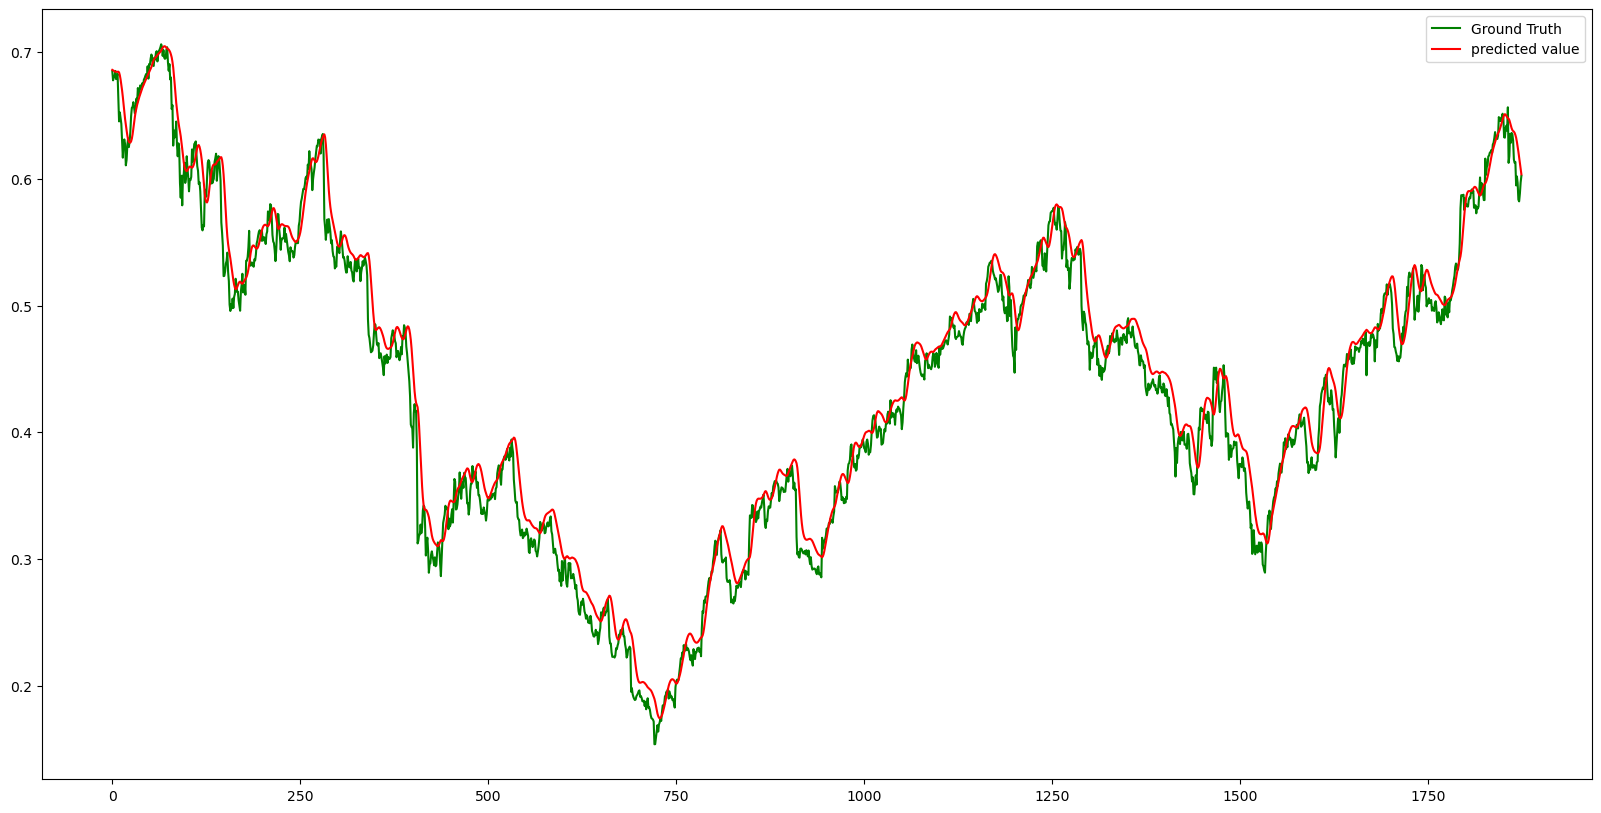

In [42]:
plt.figure(figsize=(20,10))
plt.plot(y_test,color='green',label='Ground Truth')
plt.plot(y_hat,color='red',label='predicted value')
plt.legend()
plt.show()

This example just predict one next day but in real world we actually predict several next dat.